# Aceptancia Geométrica Relativa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import Code_Aceptance.Angular_Acceptance as aa
import Code_Aceptance.Cartesian_Acceptance as ca
from tqdm import tqdm

In [2]:
# --- Simulation and Detector Parameters ---
N_MUONS = int(5e6)
L = 58  # cm, Large of the detection plane
D = 70  # cm, Separation of each detection plane
N_planes = 3 # Number of detection planes
NUM_BINS = 58 # Bins for theta distribution
n = 2 # cos^n Distribution 

theta_max = np.arctan(np.sqrt(2)*L / ( (N_planes-1) * D)) # Maximun Angle for counts

In [3]:
# --- Simulation ---
print("Starting Monte Carlo simulation...")
print(f"Simulating {N_MUONS:,} muons...")

x0, y0, theta, phi, accepted_mask = aa.generate_muons(N_MUONS, L, D, N_planes, n)
accepted_theta = theta[accepted_mask]

print(f"Simulation completed. Accepted muons: {len(accepted_theta):,}. Fraction of accepted muons: {len(accepted_theta)/N_MUONS:,}")


Starting Monte Carlo simulation...
Simulating 5,000,000 muons...


Simulating Trajectories: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

Simulation completed. Accepted muons: 1,180,742. Fraction of accepted muons: 0.2361484


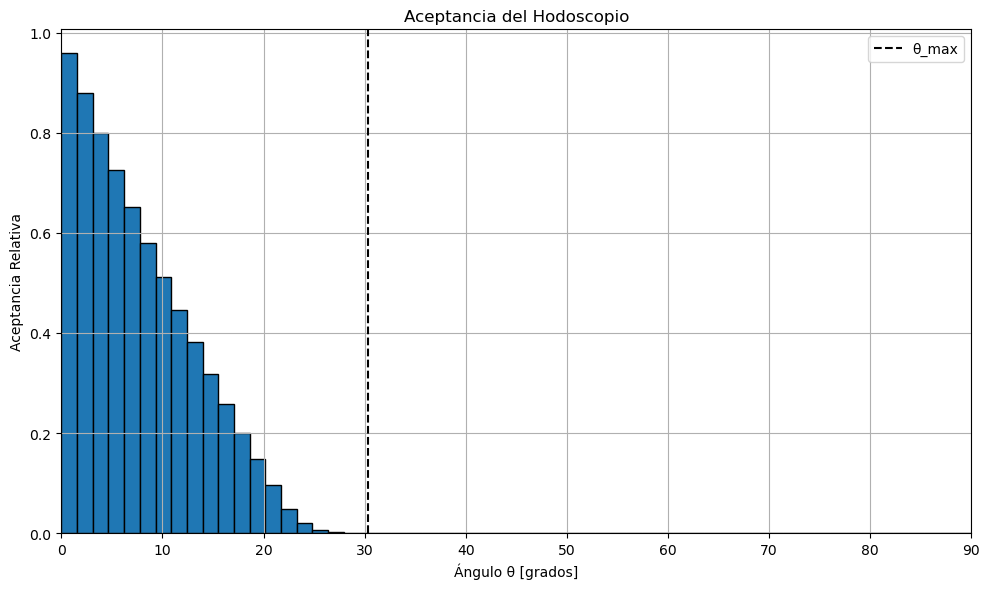

In [4]:
# --- Graphics ---
aa.plot_aceptance(theta, accepted_theta, theta_max, NUM_BINS)

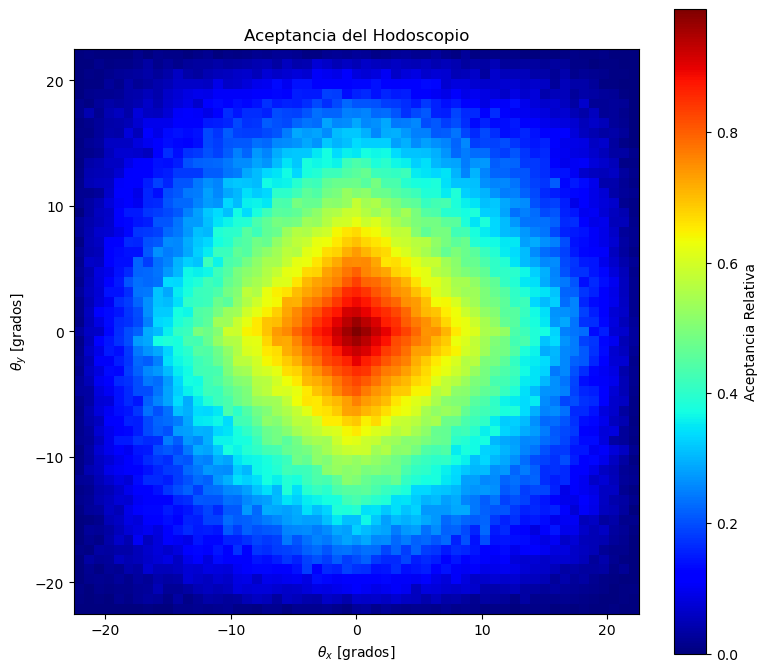

In [5]:
aa.plot_theta_xy(theta, phi, accepted_mask, N_planes, D, L, NUM_BINS)

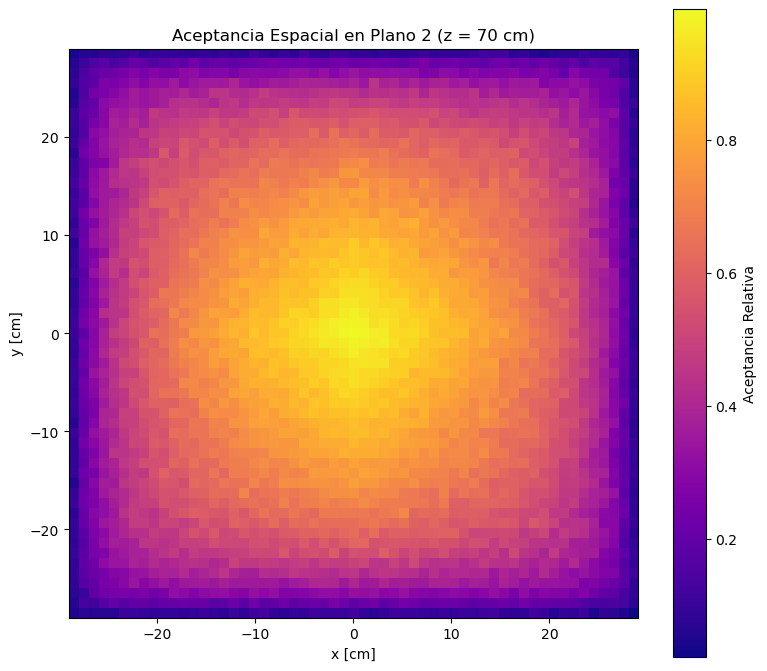

In [7]:
plane_index = 1
ca.plot_aceptance(x0, y0, theta, phi, accepted_mask, L, D, N_planes, plane_index, NUM_BINS)

## Coseno^n Distribution Verification

In [2]:
counts, bins = np.histogram(theta, bins=NUM_BINS, range=(0, np.pi/2), density=True)
bin_centers_rad = 0.5 * (bins[:-1] + bins[1:])
bin_centers_deg = np.rad2deg(bin_centers_rad)

theta_vals = np.linspace(0, np.pi/2, 1000)
pdf = np.cos(theta_vals)**n
pdf /= np.trapz(pdf, theta_vals) # Normalization

plt.figure(figsize=(10, 6))
plt.bar(bin_centers_deg, counts, width=np.rad2deg(bins[1]-bins[0]), alpha=0.6,
        label='Histograma de muestras', color='orange')
plt.plot(np.rad2deg(theta_vals), pdf, 'b-', linewidth=2, label=f'Distribución teórica ∝ cos^{n}(θ)')
plt.xlabel('Ángulo θ [grados]')
plt.ylabel('Densidad de probabilidad')
plt.title('Verificación de muestreo: cos²(θ)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined